# Affine Color Correction 

Made by: Haley Schuhl

Adapted from a tutorial by: Katie Murphy

Updated: August 18, 2023

First, import the necessary packages. 

In [1]:
%matplotlib notebook
# Change to "%matplotlib widget" for interactive plots

# Imports 
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

Next, import a sample image. Your images need to be on the server. Remember, always keep your raw images separate from your newly processed images! You will need to change the path to your image, and also if you want specific output folders and directories. 

In [2]:
# Input/output options
args = WorkflowInputs(
    images=["./img/1_B73_sand_C_2023-04-14_10_19_07.jpg"],
    names="image",
    result="results.txt",
    outdir=".",
    writeimg=False,
    debug="plot",
    sample_label="B73"
    )

In [3]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
pcv.params.sample_label = args.sample_label
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

<IPython.core.display.Javascript object>


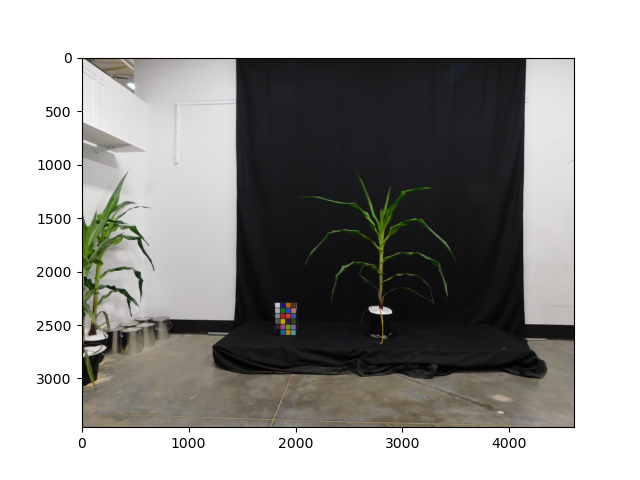

In [4]:
# Read in your image, which is based on the path you put above
img, path, filename = pcv.readimage(filename=args.image)


In [5]:
#First, find the color card. You won't see any output of this function. 

dataframe1, start1, space1 = pcv.transform.find_color_card(rgb_img=img, background='light')

<IPython.core.display.Javascript object>


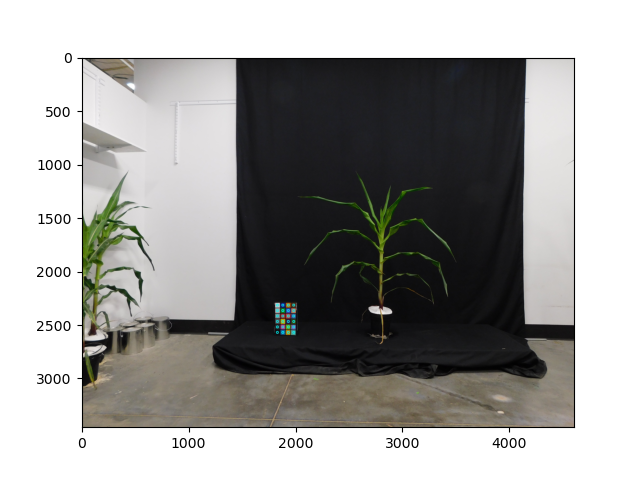

<IPython.core.display.Javascript object>


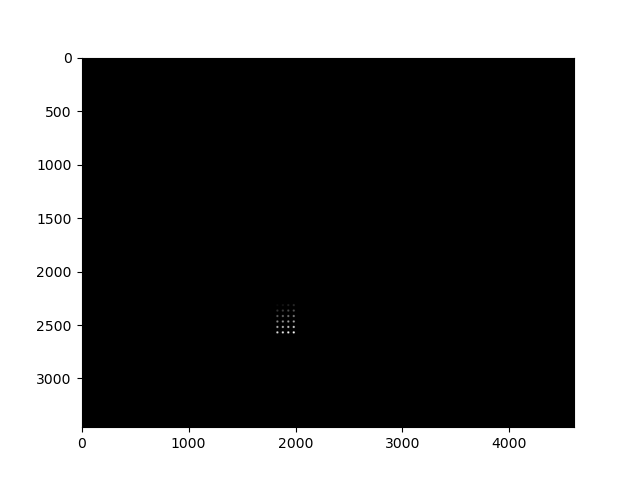

In [6]:
# Make a color card mask for your image. You should see that the color card has little circles on it, 
# nicely inside the color squares.
# If the color card can't be found, you may need to set the start coordinate and spacing manually. 
# (https://plantcv.readthedocs.io/en/latest/create_color_card_mask/)

card_mask = pcv.transform.create_color_card_mask(rgb_img=img, radius=10, start_coord=start1, 
                                                   spacing=space1, nrows=6, ncols=4)

In [7]:
# Make a color card matrix 

headers, card_matrix = pcv.transform.get_color_matrix(rgb_img=img, mask=card_mask)

In [8]:
# Define the standard color card matrix, we know what the colors of those chips should be in a "perfect" 
# image, so we will correct to those known values
# Look at where your white chip is in the image to determine which position your card is in (pos)


        #pos     = reference value indicating orientation of the color card. The reference
        #         is based on the position of the white chip:
        #        pos = 0: bottom-left corner
        #        pos = 1: bottom-right corner
        #        pos = 2: top-right corner
        #        pos = 3: top-left corner

std_color_matrix = pcv.transform.std_color_matrix (pos=3)

<IPython.core.display.Javascript object>


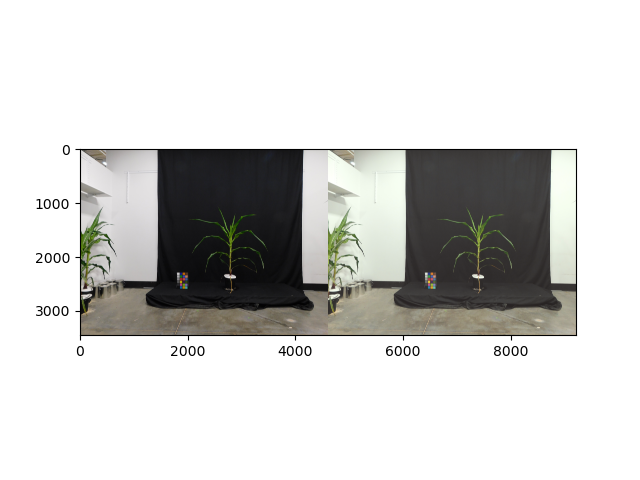

<IPython.core.display.Javascript object>


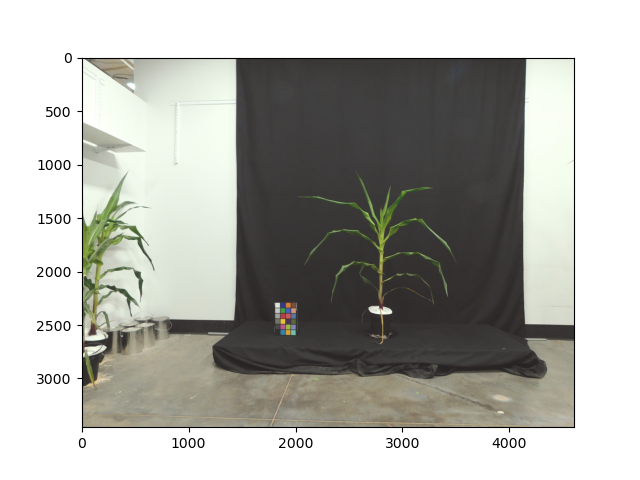

In [9]:
# Color correct your image to the standard values

img_cc = pcv.transform.affine_color_correction(rgb_img=img, source_matrix=card_matrix, 
                                               target_matrix=std_color_matrix)
pcv.plot_image(img_cc)

In [ ]:
#If you want to save your color corrected image, do so here. Do NOT save over your raw image. 
#We are saving as a temporary image here becasue we want to use it for thresholding. 

pcv.print_image(img=img_cc, filename="./img/color_corrected_img_temp.png")